In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.model_selection import ShuffleSplit

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Выясним, сколько пропусков и запоним их 

In [6]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Id - 0%
MSSubClass - 0%
MSZoning - 0%
LotFrontage - 18%
LotArea - 0%
Street - 0%
Alley - 94%
LotShape - 0%
LandContour - 0%
Utilities - 0%
LotConfig - 0%
LandSlope - 0%
Neighborhood - 0%
Condition1 - 0%
Condition2 - 0%
BldgType - 0%
HouseStyle - 0%
OverallQual - 0%
OverallCond - 0%
YearBuilt - 0%
YearRemodAdd - 0%
RoofStyle - 0%
RoofMatl - 0%
Exterior1st - 0%
Exterior2nd - 0%
MasVnrType - 1%
MasVnrArea - 1%
ExterQual - 0%
ExterCond - 0%
Foundation - 0%
BsmtQual - 3%
BsmtCond - 3%
BsmtExposure - 3%
BsmtFinType1 - 3%
BsmtFinSF1 - 0%
BsmtFinType2 - 3%
BsmtFinSF2 - 0%
BsmtUnfSF - 0%
TotalBsmtSF - 0%
Heating - 0%
HeatingQC - 0%
CentralAir - 0%
Electrical - 0%
1stFlrSF - 0%
2ndFlrSF - 0%
LowQualFinSF - 0%
GrLivArea - 0%
BsmtFullBath - 0%
BsmtHalfBath - 0%
FullBath - 0%
HalfBath - 0%
BedroomAbvGr - 0%
KitchenAbvGr - 0%
KitchenQual - 0%
TotRmsAbvGrd - 0%
Functional - 0%
Fireplaces - 0%
FireplaceQu - 47%
GarageType - 6%
GarageYrBlt - 6%
GarageFinish - 6%
GarageCars - 0%
GarageArea - 0%
GarageQu

In [7]:
data.drop(['Alley', 'MiscFeature', 'Fence', 'PoolQC', 'FireplaceQu'],
                 axis='columns', inplace=True)

In [8]:
data_numeric = data.select_dtypes(include=[np.number])
numeric_cols = data_numeric.columns.values
print(numeric_cols)

['Id' 'MSSubClass' 'LotFrontage' 'LotArea' 'OverallQual' 'OverallCond'
 'YearBuilt' 'YearRemodAdd' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2'
 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF'
 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath'
 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces' 'GarageYrBlt'
 'GarageCars' 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'MiscVal' 'MoSold' 'YrSold'
 'SalePrice']


In [9]:
data_non_numeric = data.select_dtypes(exclude=[np.number])
non_numeric_cols = data_non_numeric.columns.values
print(non_numeric_cols)

['MSZoning' 'Street' 'LotShape' 'LandContour' 'Utilities' 'LotConfig'
 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2' 'BldgType'
 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st' 'Exterior2nd'
 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond'
 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2' 'Heating' 'HeatingQC'
 'CentralAir' 'Electrical' 'KitchenQual' 'Functional' 'GarageType'
 'GarageFinish' 'GarageQual' 'GarageCond' 'PavedDrive' 'SaleType'
 'SaleCondition']


In [10]:
for col in numeric_cols:
    missing = data[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0: 
        print('imputing missing values for: {}'.format(col))
        med = data[col].median()
        data[col] = data[col].fillna(med)

imputing missing values for: LotFrontage
imputing missing values for: MasVnrArea
imputing missing values for: GarageYrBlt


In [11]:
data_non_numeric = data.select_dtypes(exclude=[np.number])
non_numeric_cols = data_non_numeric.columns.values
for col in non_numeric_cols:
    missing = data[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('imputing missing values for: {}'.format(col))
        
        top = data[col].describe()['top'] 
        data[col] = data[col].fillna(top)

imputing missing values for: MasVnrType
imputing missing values for: BsmtQual
imputing missing values for: BsmtCond
imputing missing values for: BsmtExposure
imputing missing values for: BsmtFinType1
imputing missing values for: BsmtFinType2
imputing missing values for: Electrical
imputing missing values for: GarageType
imputing missing values for: GarageFinish
imputing missing values for: GarageQual
imputing missing values for: GarageCond


Ищем выбросы

<AxesSubplot:>

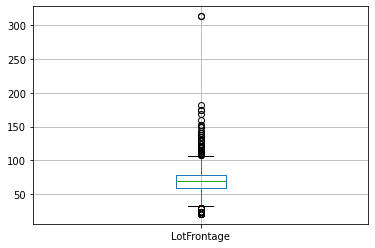

In [12]:
data.boxplot(column=['LotFrontage'])

In [13]:
data['BsmtFinSF1'].describe()

count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
max      5644.000000
Name: BsmtFinSF1, dtype: float64

<AxesSubplot:>

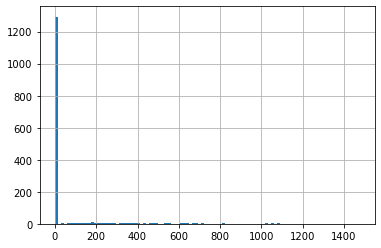

In [14]:
data['BsmtFinSF2'].hist(bins=100)

In [15]:
data.drop(data[data.MSSubClass > 100].index, inplace=True)
data.drop(data[data.LotFrontage > 100].index, inplace=True)
data.drop(data[data.LotArea > 40000].index, inplace=True)
data.drop(data[data.MasVnrArea > 1200].index, inplace=True)
data.drop(data[data.BsmtFinSF1 > 2000].index, inplace=True)
data.drop(data[data.MiscVal > 4000].index, inplace=True)

In [16]:
num_rows = len(data.index)
low_information_cols = [] 
for col in data.columns:
    cnts = data[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Street: 99.74425%
Pave    1170
Grvl       3
Name: Street, dtype: int64

Utilities: 99.91475%
AllPub    1172
NoSeWa       1
Name: Utilities, dtype: int64

LandSlope: 95.14066%
Gtl    1116
Mod      49
Sev       8
Name: LandSlope, dtype: int64

Condition2: 99.23274%
Norm     1164
Feedr       5
RRNn        2
PosA        1
RRAn        1
Name: Condition2, dtype: int64

BldgType: 95.65217%
1Fam      1122
Duplex      50
2fmCon       1
Name: BldgType, dtype: int64

RoofMatl: 98.38022%
CompShg    1154
Tar&Grv       8
WdShake       5
WdShngl       3
Metal         1
Roll          1
Membran       1
Name: RoofMatl, dtype: int64

Heating: 97.78346%
GasA     1147
GasW       14
Grav        5
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

LowQualFinSF: 98.55072%
0      1156
360       2
53        1
120       1
144       1
156       1
205       1
232       1
572       1
528       1
384       1
390       1
420       1
473       1
481       1
514       1
371       1
Name: LowQualFinS

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1173 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1173 non-null   int64  
 1   MSSubClass     1173 non-null   int64  
 2   MSZoning       1173 non-null   object 
 3   LotFrontage    1173 non-null   float64
 4   LotArea        1173 non-null   int64  
 5   Street         1173 non-null   object 
 6   LotShape       1173 non-null   object 
 7   LandContour    1173 non-null   object 
 8   Utilities      1173 non-null   object 
 9   LotConfig      1173 non-null   object 
 10  LandSlope      1173 non-null   object 
 11  Neighborhood   1173 non-null   object 
 12  Condition1     1173 non-null   object 
 13  Condition2     1173 non-null   object 
 14  BldgType       1173 non-null   object 
 15  HouseStyle     1173 non-null   object 
 16  OverallQual    1173 non-null   int64  
 17  OverallCond    1173 non-null   int64  
 18  YearBuil

In [18]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=non_numeric_cols).fit(data)
numeric_dataset = encoder.transform(data)

In [19]:
numeric_dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,1,65.0,8450,1,1,1,1,1,...,0,0,0,0,0,2,2008,1,1,208500
1,2,20,1,80.0,9600,1,1,1,1,2,...,0,0,0,0,0,5,2007,1,1,181500
2,3,60,1,68.0,11250,1,2,1,1,1,...,0,0,0,0,0,9,2008,1,1,223500
3,4,70,1,60.0,9550,1,2,1,1,3,...,272,0,0,0,0,2,2006,1,2,140000
4,5,60,1,84.0,14260,1,2,1,1,2,...,0,0,0,0,0,12,2008,1,1,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,1,62.0,7917,1,1,1,1,1,...,0,0,0,0,0,8,2007,1,1,175000
1456,1457,20,1,85.0,13175,1,1,1,1,1,...,0,0,0,0,0,2,2010,1,1,210000
1457,1458,70,1,66.0,9042,1,1,1,1,1,...,0,0,0,0,2500,5,2010,1,1,266500
1458,1459,20,1,68.0,9717,1,1,1,1,1,...,112,0,0,0,0,4,2010,1,1,142125


RandomForestRegresso

In [20]:
X_train, X_test, y_train, y_test = train_test_split(numeric_dataset.drop(columns='SalePrice'), numeric_dataset['SalePrice'], test_size=0.30, random_state=42)

In [21]:
clf_rf = RandomForestRegressor()
clf_rf.fit(X_train, y_train)

RandomForestRegressor()

In [22]:
clf_rf.score(X_train, y_train)

0.9809559575530101

In [23]:
clf_rf.score(X_test, y_test)

0.8731636745439845

In [24]:
imp = pd.Series(clf_rf.feature_importances_)

In [25]:
imp.index = pd.Series(X_train.columns)

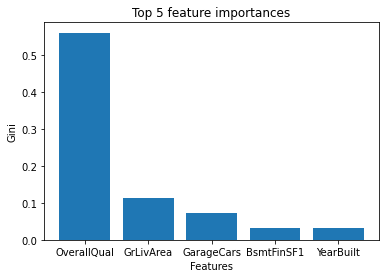

In [26]:
plt.title('Top 5 feature importances')
plt.xlabel('Features')
plt.ylabel('Gini')
plt.bar(imp.sort_values(ascending=False).head().index, imp.sort_values(ascending=False).head())
plt.show()

Стекинг

In [27]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import RidgeCV

In [28]:
Regressor = StackingRegressor(
    [
        ('LinearRegression', LinearRegression()),
        ('KNeighborsRegressor', KNeighborsRegressor()),
        ('DecisionTree', DecisionTreeRegressor())
    ], RidgeCV())

In [29]:
Regressor.fit(X_train, y_train)

StackingRegressor(estimators=[('LinearRegression', LinearRegression()),
                              ('KNeighborsRegressor', KNeighborsRegressor()),
                              ('DecisionTree', DecisionTreeRegressor())],
                  final_estimator=RidgeCV(alphas=array([ 0.1,  1. , 10. ])))

In [30]:
print(f'Score on train data {Regressor.score(X_train, y_train)}')
print(f'Score on test data {Regressor.score(X_test, y_test)}')

for i in Regressor.named_estimators:
    print(f'Score on train data with model {i} {Regressor.named_estimators_[i].score(X_train, y_train)}')
    print(f'Score on test data with model {i} {Regressor.named_estimators_[i].score(X_test, y_test)}')


Score on train data 0.9382329894865287
Score on test data 0.8747333149404911
Score on train data with model LinearRegression 0.9133589668680174
Score on test data with model LinearRegression 0.8648574828709488
Score on train data with model KNeighborsRegressor 0.7671149337861767
Score on test data with model KNeighborsRegressor 0.6631700861706228
Score on train data with model DecisionTree 1.0
Score on test data with model DecisionTree 0.7460409418967571


Видно, что лучше всего обучилась линейная регрессия, скор ансамбля наиболее высокий